# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mandan
Processing Record 3 of Set 1 | voh
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | parambu
Processing Record 6 of Set 1 | boa vista
Processing Record 7 of Set 1 | banjar
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | yerbogachen
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | novyy urengoy
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | yeppoon
Processing Record 18 of Set 1 | ust-ilimsk
Processing Record 19 of Set 1 | gambela
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | west bay
Processing Record 22 of Set 1 | mataura
Processing Record 23 of 

Processing Record 35 of Set 4 | port elizabeth
Processing Record 36 of Set 4 | awjilah
Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | kaka
Processing Record 39 of Set 4 | apollonia
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | jumla
Processing Record 42 of Set 4 | turmalina
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | guadalupe y calvo
Processing Record 45 of Set 4 | kawana waters
City not found. Skipping...
Processing Record 46 of Set 4 | thinadhoo
Processing Record 47 of Set 4 | saint-francois
Processing Record 48 of Set 4 | san vicente
Processing Record 49 of Set 4 | yuancheng
Processing Record 0 of Set 5 | riohacha
Processing Record 1 of Set 5 | cabras
Processing Record 2 of Set 5 | north bend
Processing Record 3 of Set 5 | gizo
Processing Record 4 of Set 5 | kenai
Processing Record 5 of Set 5 | kandrian
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | lorengau
Processing Record

Processing Record 24 of Set 8 | bandarbeyla
Processing Record 25 of Set 8 | taicheng
Processing Record 26 of Set 8 | ipixuna
Processing Record 27 of Set 8 | kaeo
Processing Record 28 of Set 8 | puerto ayacucho
Processing Record 29 of Set 8 | burica
City not found. Skipping...
Processing Record 30 of Set 8 | tieli
Processing Record 31 of Set 8 | singapore
Processing Record 32 of Set 8 | yar-sale
Processing Record 33 of Set 8 | muros
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | toba
Processing Record 36 of Set 8 | victoria
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | stokmarknes
Processing Record 40 of Set 8 | rovaniemi
Processing Record 41 of Set 8 | monopoli
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | kalangala
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | ust-kan
Processing Record 46 of Set 8 | raudeberg
Processing Record 47 of S

Processing Record 16 of Set 12 | sergeyevka
Processing Record 17 of Set 12 | artyk
City not found. Skipping...
Processing Record 18 of Set 12 | visby
Processing Record 19 of Set 12 | angoche
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | ketchikan
Processing Record 22 of Set 12 | esmeraldas
Processing Record 23 of Set 12 | miyazu
Processing Record 24 of Set 12 | yaan
Processing Record 25 of Set 12 | mwingi
Processing Record 26 of Set 12 | san luis
Processing Record 27 of Set 12 | rabaul
Processing Record 28 of Set 12 | mackenzie
Processing Record 29 of Set 12 | sogne
Processing Record 30 of Set 12 | bacuit
City not found. Skipping...
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | palmer
Processing Record 33 of Set 12 | yirol
City not found. Skipping...
Processing Record 34 of Set 12 | yarmouth
Processing Record 35 of Set 12 | yanam
Processing Record 36 of Set 12 | langsa
Processing Record 37 of Set 12 | constantine
Processing Recor

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,11.81,47,75,9.77,AR,1678437219
1,mandan,46.8267,-100.8896,-10.00,89,100,2.06,US,1678436729
2,voh,-20.9667,164.7000,25.93,75,27,2.54,NC,1678437220
3,parambu,-6.2111,-40.6944,19.61,90,99,0.94,BR,1678437222
4,boa vista,2.8197,-60.6733,25.99,78,75,2.57,BR,1678437222


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,11.81,47,75,9.77,AR,1678437219
1,mandan,46.8267,-100.8896,-10.00,89,100,2.06,US,1678436729
2,voh,-20.9667,164.7000,25.93,75,27,2.54,NC,1678437220
3,parambu,-6.2111,-40.6944,19.61,90,99,0.94,BR,1678437222
4,boa vista,2.8197,-60.6733,25.99,78,75,2.57,BR,1678437222


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

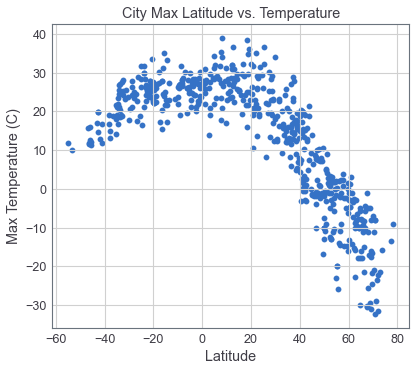

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

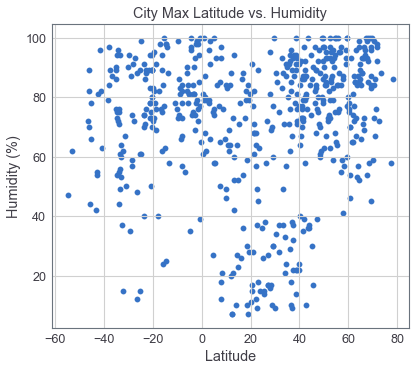

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

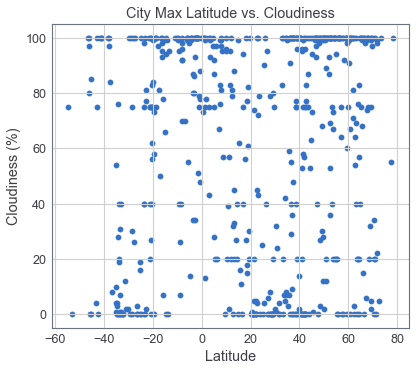

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

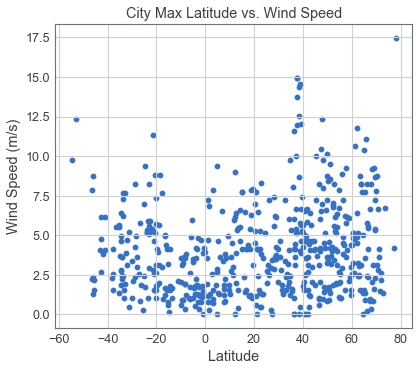

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
def line_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    xmin = x_values.min()
    ymin = y_values.min()
    plt.annotate(line,(xmin, ymin),fontsize=15,color="red")
    print(f'The r-values is: {rvalue}')
    return (slope * x_values + intercept)

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mandan,46.8267,-100.8896,-10.00,89,100,2.06,US,1678436729
4,boa vista,2.8197,-60.6733,25.99,78,75,2.57,BR,1678437222
7,yerbogachen,61.2767,108.0108,-14.18,93,100,5.10,RU,1678437225
11,novyy urengoy,66.0833,76.6333,-9.28,93,100,8.22,RU,1678437227
13,khatanga,71.9667,102.5000,-22.29,98,99,2.16,RU,1678437229


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,11.81,47,75,9.77,AR,1678437219
2,voh,-20.9667,164.7000,25.93,75,27,2.54,NC,1678437220
3,parambu,-6.2111,-40.6944,19.61,90,99,0.94,BR,1678437222
5,banjar,-8.1900,114.9675,28.02,84,98,0.36,ID,1678437223
6,hermanus,-34.4187,19.2345,21.00,72,28,2.83,ZA,1678437224


###  Temperature vs. Latitude Linear Regression Plot

The r-values is: -0.885223159608029


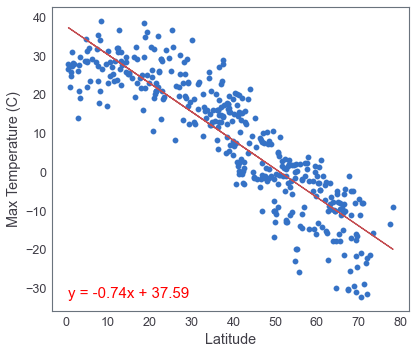

In [133]:
# Linear regression on Northern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

#linear regression values #y=mx+b
ntemp_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

#plot linear regression line
plt.plot(northern_hemi_df['Lat'], ntemp_regress,'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()

The r-values is: 0.592764658145063


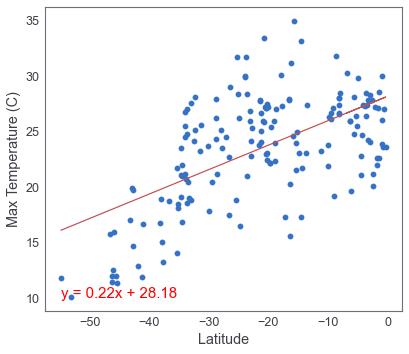

In [134]:
# Linear regression on Southern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
#linear regression values #y=mx+b
stemp_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
#plot linear regression line
plt.plot(southern_hemi_df['Lat'], stemp_regress,'r-')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()

**Discussion about the linear relationship:** 

A negative correlation is observed between latitude and temperature for the northern hemisphere. As latitude increases the max temperature decreases.

A positve correlation is observed between latitude and temperature for the southern hemisphere. As latitiude increases the max temeperature does as well. 

### Humidity vs. Latitude Linear Regression Plot

The r-values is: 0.34588578456431335


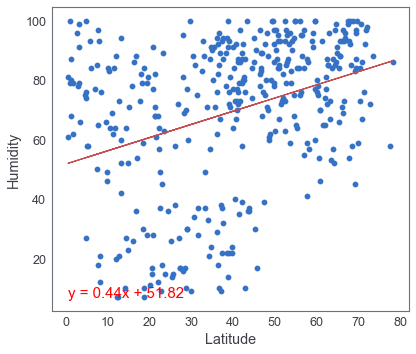

In [135]:
# Northern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

#linear regression values #y=mx+b
nhumid_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

#plot linear regression line
plt.plot(northern_hemi_df['Lat'], nhumid_regress,'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

The r-values is: 0.2371705267365598


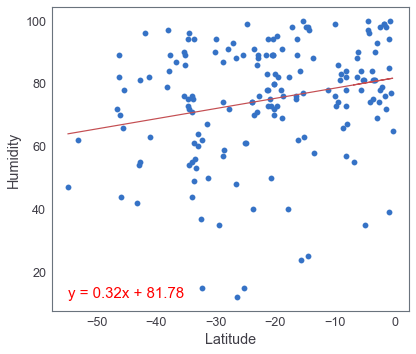

In [136]:
# Southern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
#linear regression values #y=mx+b
shumid_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
#plot linear regression line
plt.plot(southern_hemi_df['Lat'], shumid_regress,'r-')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

**Discussion about the linear relationship:** 

A positive correlation between latitude and humidity is observed in both the northern and southern hemipsheres. So, as latitude increases so does the area's humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-values is: 0.13497768420277687


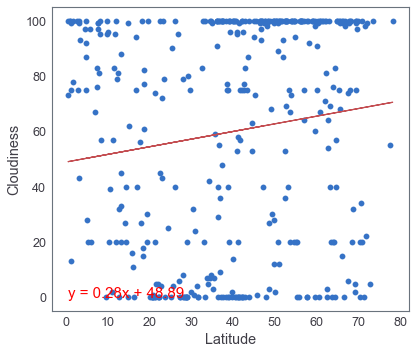

In [137]:
# Northern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

#linear regression values #y=mx+b
ncloud_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

#plot linear regression line
plt.plot(northern_hemi_df['Lat'], ncloud_regress,'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

The r-values is: 0.3985759291273964


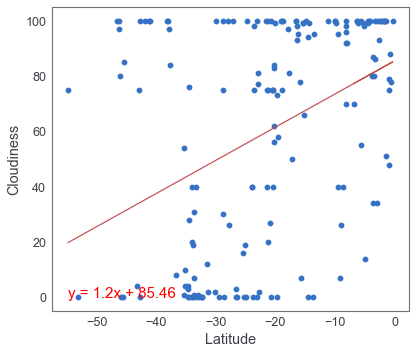

In [138]:
# Southern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
#linear regression values #y=mx+b
scloud_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
#plot linear regression line
plt.plot(southern_hemi_df['Lat'], scloud_regress,'r-')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

**Discussion about the linear relationship:** 

A positive correlation between latitude and coudiness is observed in both the northern and southern hemipsheres. So, as latitude increases so does the area's cloudiness. However, the positve correlation is stronger in the southern hemisphere with an r-value of 0.39 vs the 0.13 r-value of the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-values is: 0.1626218538318342


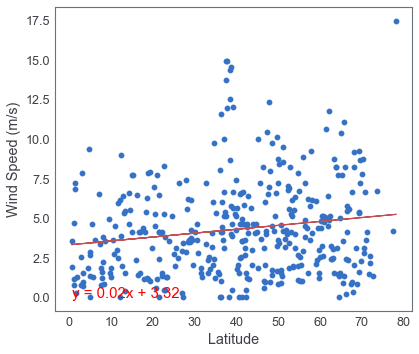

In [140]:
# Northern Hemisphere
#scatter plot for northern hemisphere data
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

#linear regression values #y=mx+b
nwind_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

#plot linear regression line
plt.plot(northern_hemi_df['Lat'], nwind_regress,'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.show()

The r-values is: -0.36564320653903715


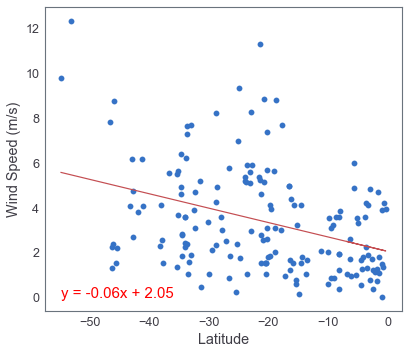

In [139]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
#linear regression values #y=mx+b
swind_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
#plot linear regression line
plt.plot(southern_hemi_df['Lat'], swind_regress,'r-')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.show()

**Discussion about the linear relationship:** 

A slight positve correlation (r-value = 0.16) is observed between latitude and wind speed for the northern hemisphere.

A negative correlation is observed between latitude and wind speed for the southern hemisphere. As latitiude increases the wind speed decreases. 